In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data
df = pd.read_csv('../data/cleaning_data_phase2.csv.zip')

In [3]:
columns = [
    '_michd', '_sex', 'genhlth',
    'physhlth', 'menthlth', 'addepev3',
    'checkup1', '_totinda', '_rfhype6',
    'cholmed3', '_rfchol3', 'cvdstrk3',
    '_asthms1', 'chcscncr','chcocncr'
]

In [4]:
df_ran = df[columns].copy()

In [5]:
df_ran.head(2)

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No


In [6]:
df_ran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414511 entries, 0 to 414510
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _michd    414511 non-null  object 
 1   _sex      414511 non-null  object 
 2   genhlth   414511 non-null  object 
 3   physhlth  406020 non-null  float64
 4   menthlth  407427 non-null  float64
 5   addepev3  414511 non-null  object 
 6   checkup1  414511 non-null  object 
 7   _totinda  414511 non-null  object 
 8   _rfhype6  414511 non-null  object 
 9   cholmed3  414511 non-null  object 
 10  _rfchol3  414511 non-null  object 
 11  cvdstrk3  414511 non-null  object 
 12  _asthms1  414511 non-null  object 
 13  chcscncr  414511 non-null  object 
 14  chcocncr  414511 non-null  object 
dtypes: float64(2), object(13)
memory usage: 47.4+ MB


In [7]:
# Map target variable 
df_ran['Heart_Disease'] = df_ran['_michd'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df_ran.head(2)

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr,Heart_Disease
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No,0
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No,1


In [9]:
# Map columns to readable description
cat_columns_description = {
    '_michd': 'Heart Disease',
    '_sex': 'Sex',
    'genhlth': 'General Health Status',
    'addepev3': 'Depressive Disorder',
    'checkup1': 'General Physical Exam',
    '_totinda': 'Physical Activity',
    '_rfhype6': 'High Blood Pressure',
    'cholmed3': 'Currently Taking Medicine For High Cholesterol',
    '_rfchol3': 'High Cholesterol',
    'cvdstrk3': 'Stroke',
    '_asthms1': 'Asthma Status',
    'chcscncr': 'Skin Cancer',
    'chcocncr': 'Other Cancer'
}

num_columns_description = {
    'physhlth': 'Number of Days Physical Health Not Good',
    'menthlth': 'Number of Days Mental Health not Good'
}

In [10]:
# Creating barchart of count by different columns with or without heart disease
def cat_count_eda(col):
    plt.figure(figsize = (10, 6))
    ax = sns.barplot(y = df_ran[col].value_counts().index, x = df_ran[col].value_counts().values)
    ax.bar_label(ax.containers[0])
    plt.title(f'Count by {cat_columns_description[col]}', size = 20)
    plt.xlabel('Count', size = 15)
    plt.ylabel(f'{cat_columns_description[col]}', size = 15);
    if col == '_michd':
        plt.savefig(f'../graph/{cat_columns_description[col]}.png')

In [11]:
# Creating barchar of frequency of heart disease for different types of each columns
def cat_disease_frequency(c):
    plt.figure(figsize = (10, 6))
    cur_df = df_ran.groupby(c).agg({'Heart_Disease': 'mean'})
    cur_df.sort_values('Heart_Disease', ascending = False, inplace = True)
    cur_df['Heart_Disease'] = cur_df['Heart_Disease'].apply(lambda x: round(x, 2))
    ax = sns.barplot(x = cur_df['Heart_Disease'], y = cur_df.index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Frequency of Heart Disease for different types of {cat_columns_description[c]}', size = 20)
    plt.xlabel('Frequency of Heart Disease', size = 15)
    plt.ylabel(f'Type of {cat_columns_description[c]}', size = 15);

In [12]:
df_ran.head(2)

,_michd,_sex,genhlth,physhlth,menthlth,addepev3,checkup1,_totinda,_rfhype6,cholmed3,_rfchol3,cvdstrk3,_asthms1,chcscncr,chcocncr,Heart_Disease
0,No,Female,Poor,20.0,10.0,No,Within past 2 years (1 year but < 2 years ago),No physical activity or exercise in last 30 days,No,Yes,Yes,No,Current,No,No,0
1,Yes,Female,Good,0.0,0.0,No,Within past year (anytime < 12 months ago),Had physical activity or exercise,Yes,Yes,Yes,No,Never,No,No,1


# Categorical Varaibles
- If the categories 'Don't know/Not sure' and 'Refused' account for a very small fraction of the total responses, I will not be focusing on them in our analysis.

## _michd: Target Variable, Heart Disease

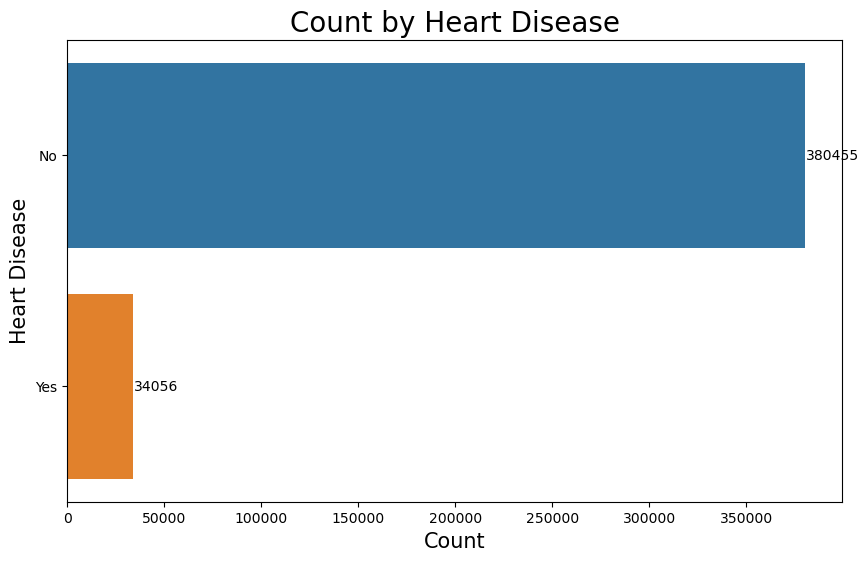

In [13]:
cat_count_eda('_michd')

Our dataset exhibits significant imbalance with respect to heart disease occurrence. Specifically, the number of individuals without heart disease is ten times greater than those diagnosed with the condition.

## _sex: sex

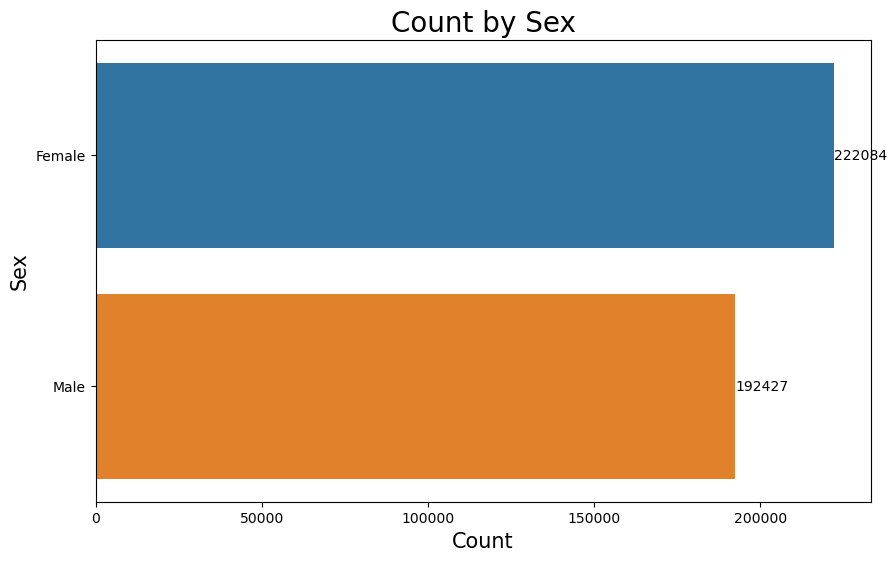

In [14]:
cat_count_eda('_sex')

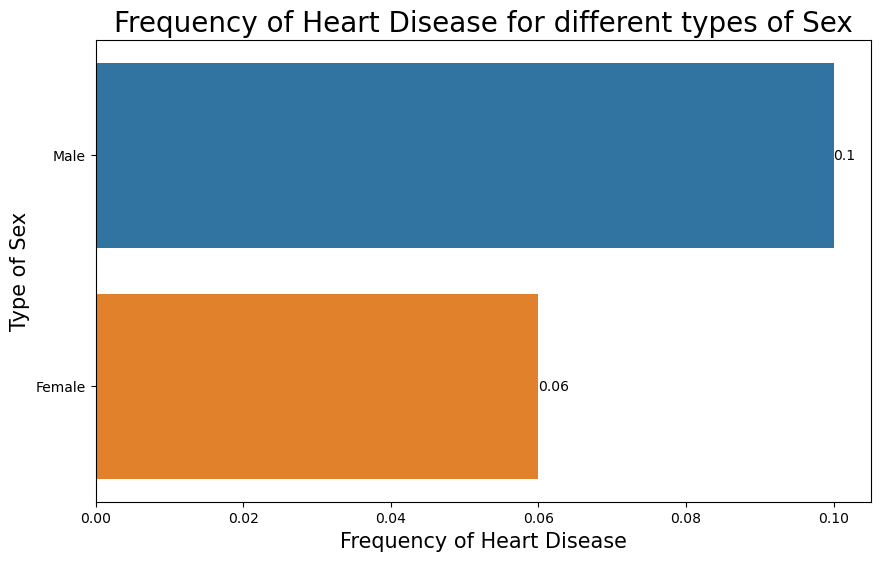

In [15]:
cat_disease_frequency('_sex')

In our dataset, the proportion of heart disease in males is 0.1, while for females it is 0.06. This suggests that men in this dataset appear to have a higher likelihood of developing heart disease compared to women.

## genhlth: General Health Status

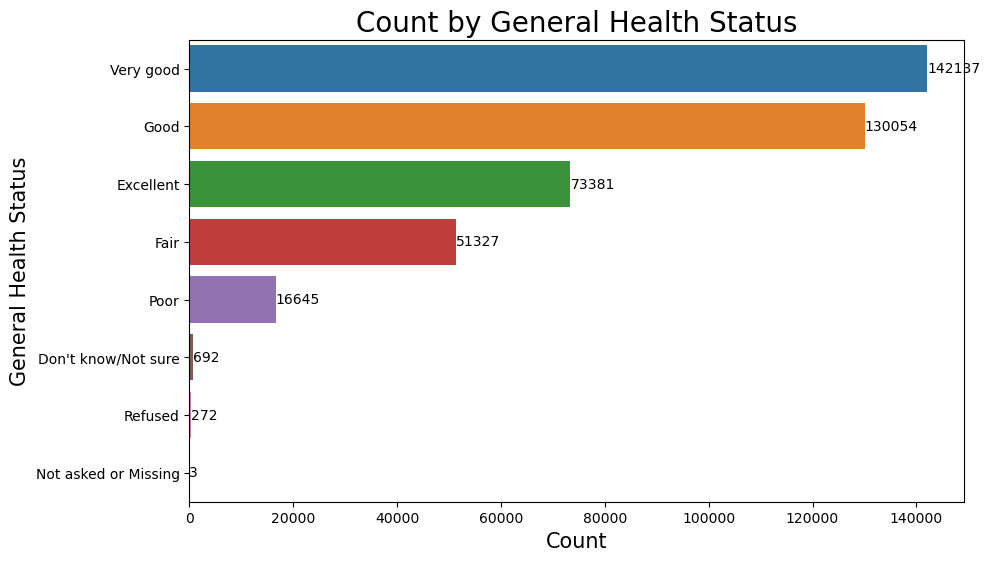

In [16]:
cat_count_eda('genhlth')

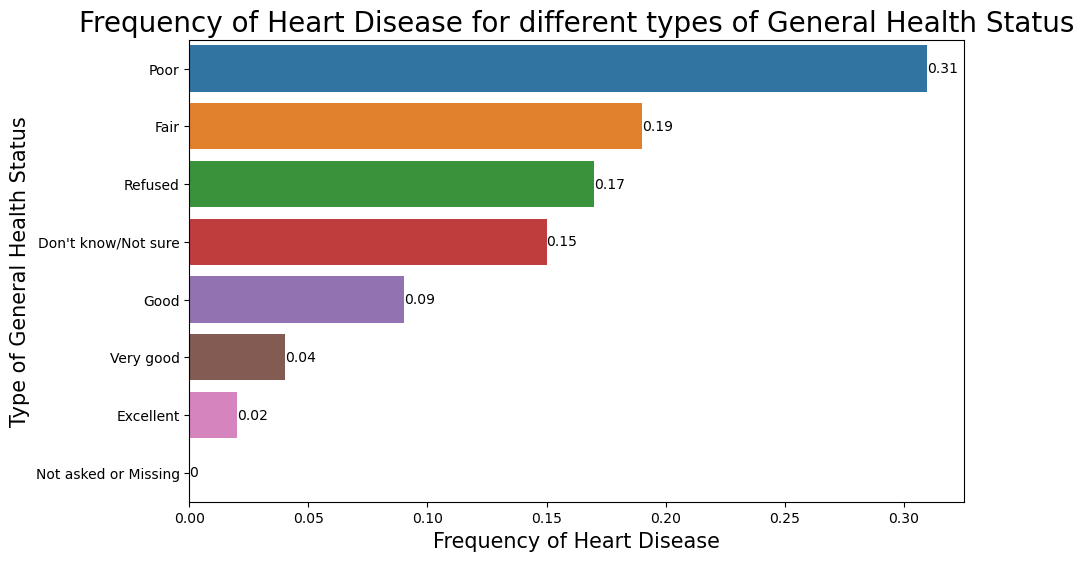

In [17]:
cat_disease_frequency('genhlth')

It suggests a potential relationship between health status and the prevalence of heart disease, with heart disease being less common among individuals who perceive their health as better.

## addepev3: Depressive Disorder

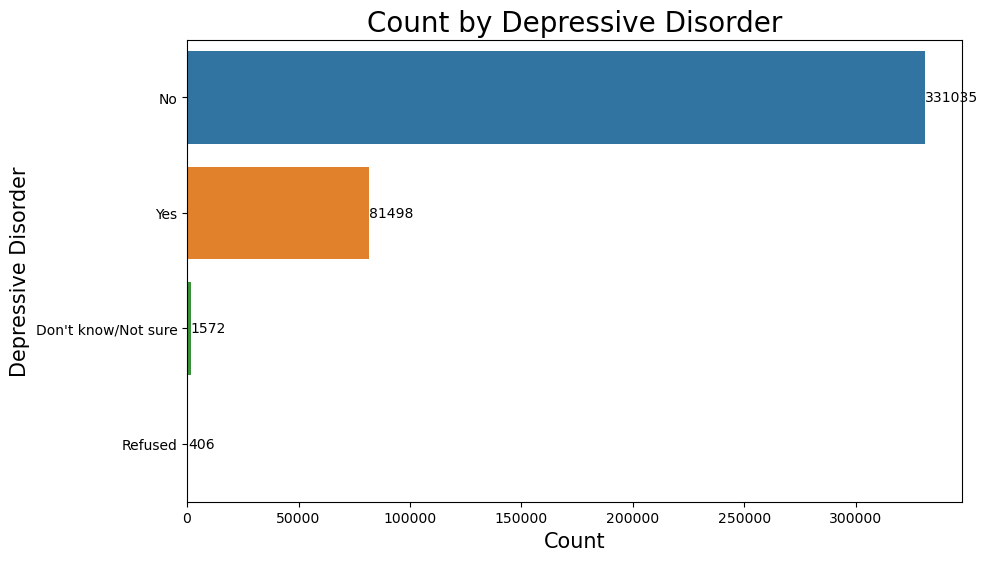

In [18]:
cat_count_eda('addepev3')

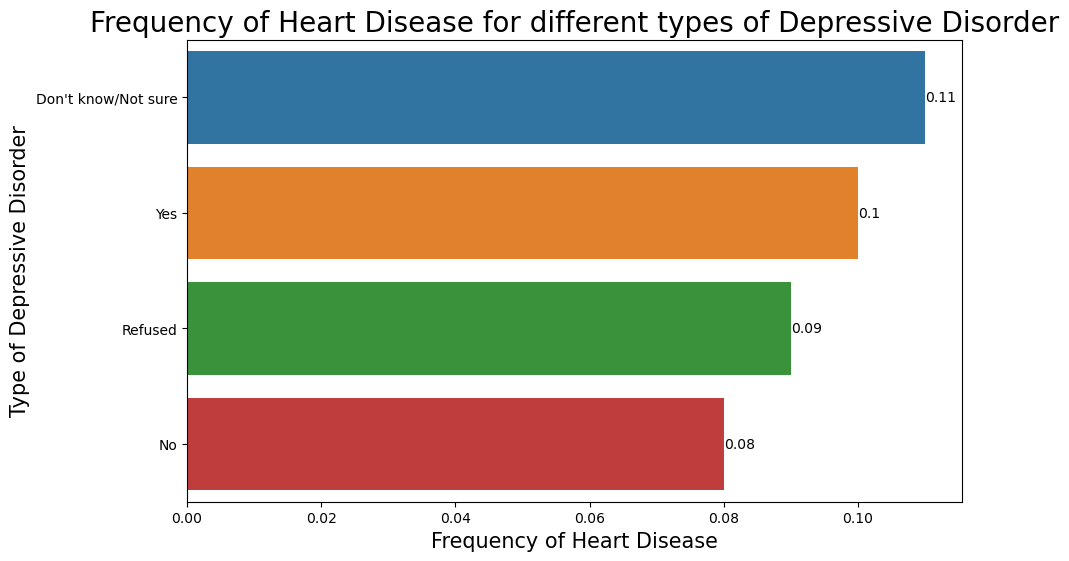

In [19]:
cat_disease_frequency('addepev3')

It suggests a potential relationship between Depressive Disorder and the prevalence of heart disease, with heart disease being more common among individuals who has depressive disorder.

## checkup1: General Physical Exam

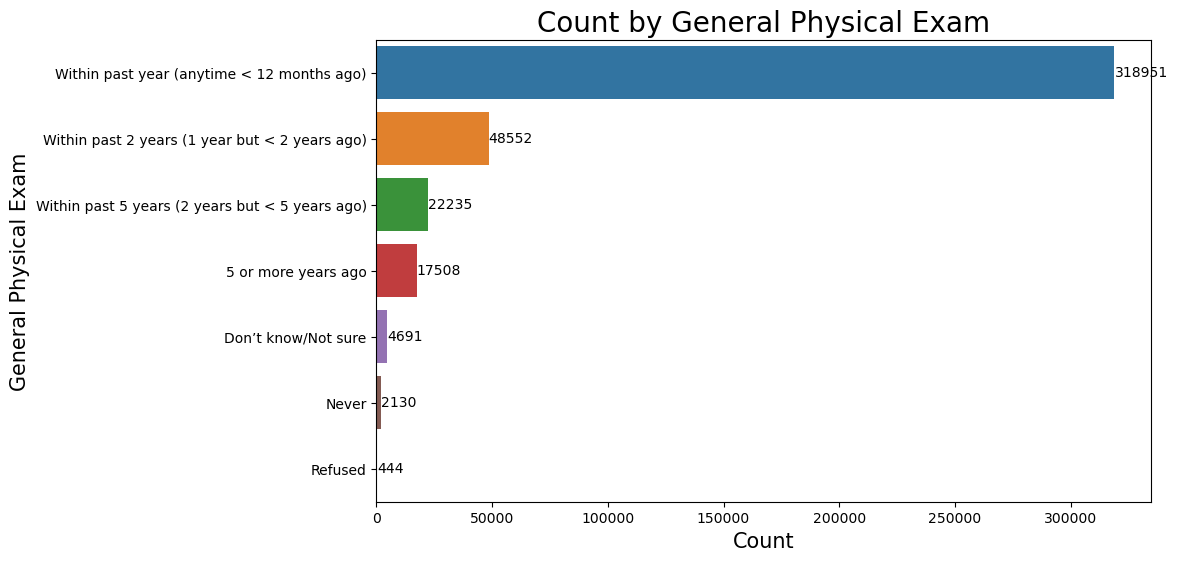

In [20]:
cat_count_eda('checkup1')

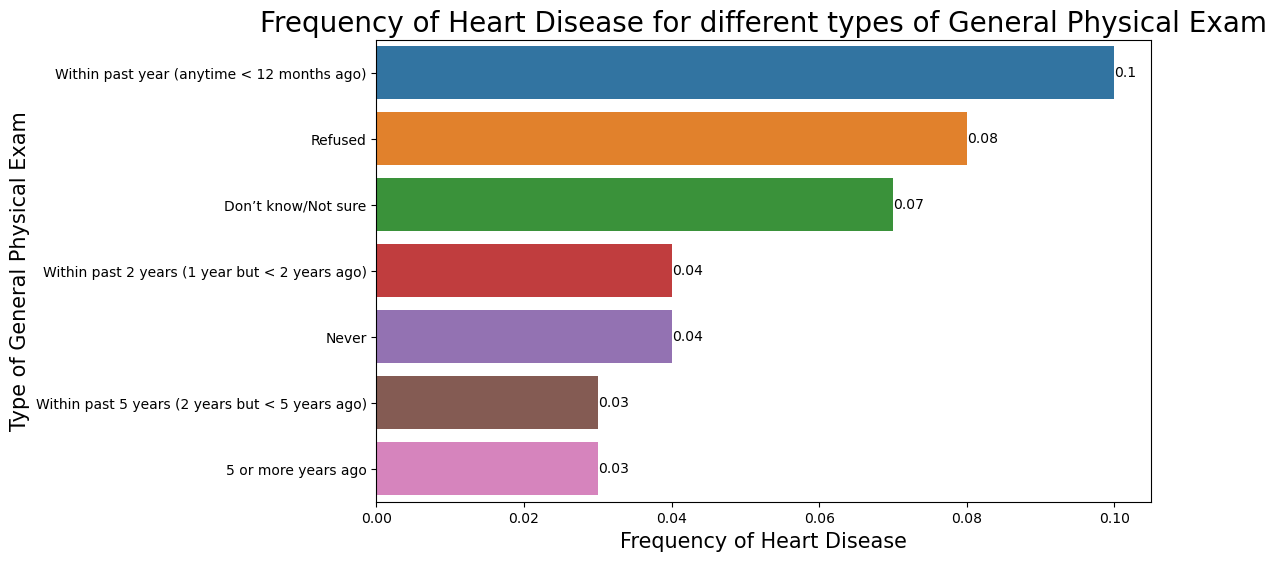

In [21]:
cat_disease_frequency('checkup1')

It looks like no relationship between heart disease and general physical exam

## _totinda: Physical Activity

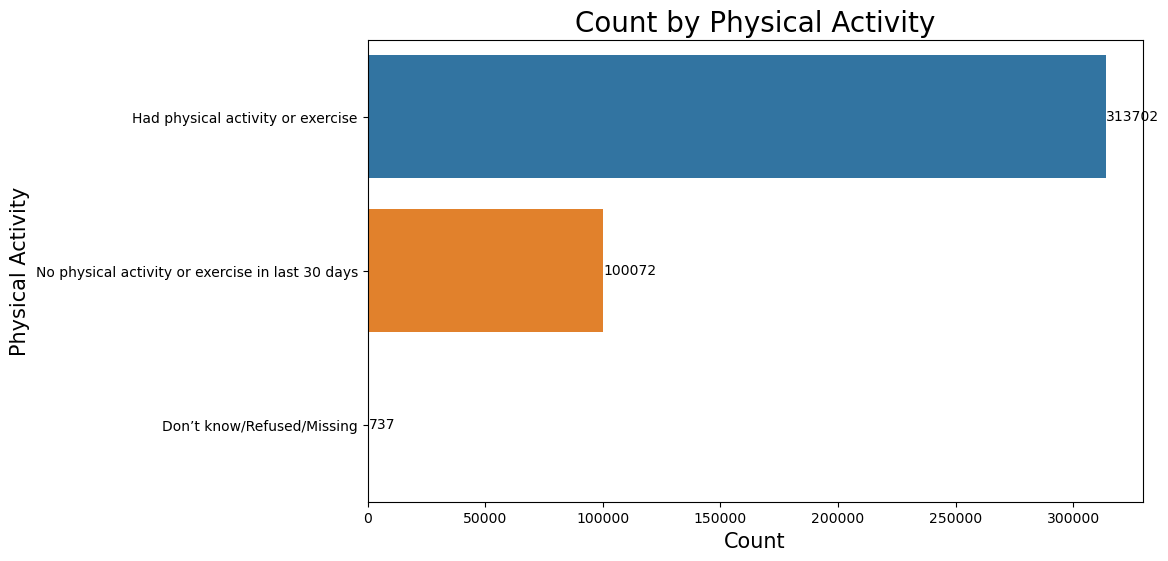

In [22]:
cat_count_eda('_totinda')

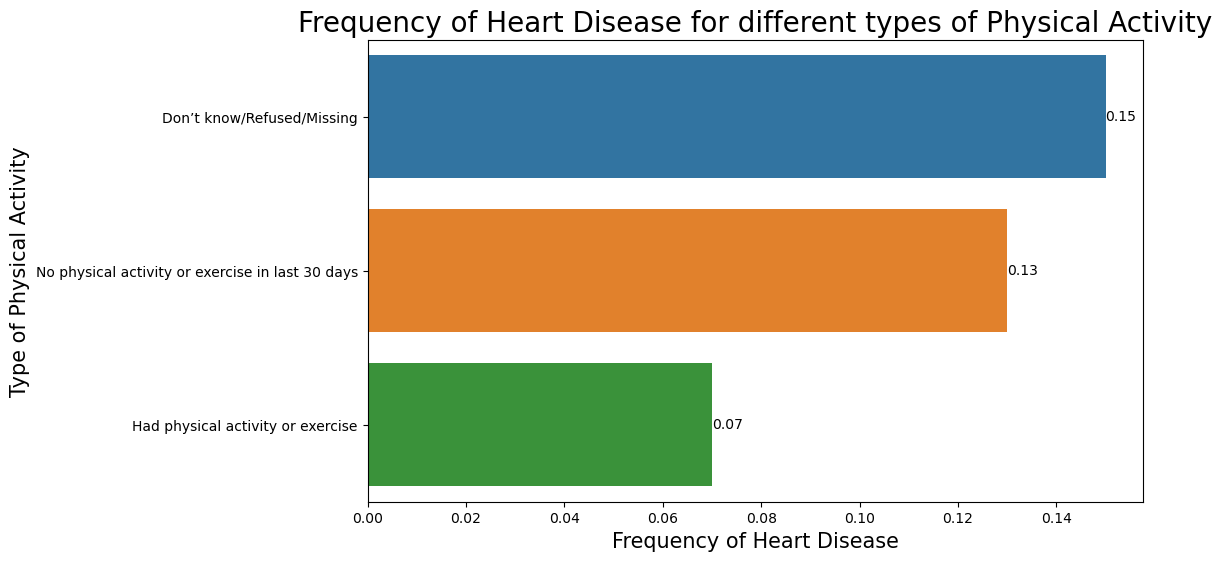

In [23]:
cat_disease_frequency('_totinda')

It suggests a potential relationship between phyisical activity in last 30 days and the prevalence of heart disease, with heart disease being more common among individuals who didn't have physical activity or exercise.

## _rfhype6: High Blood Pressure

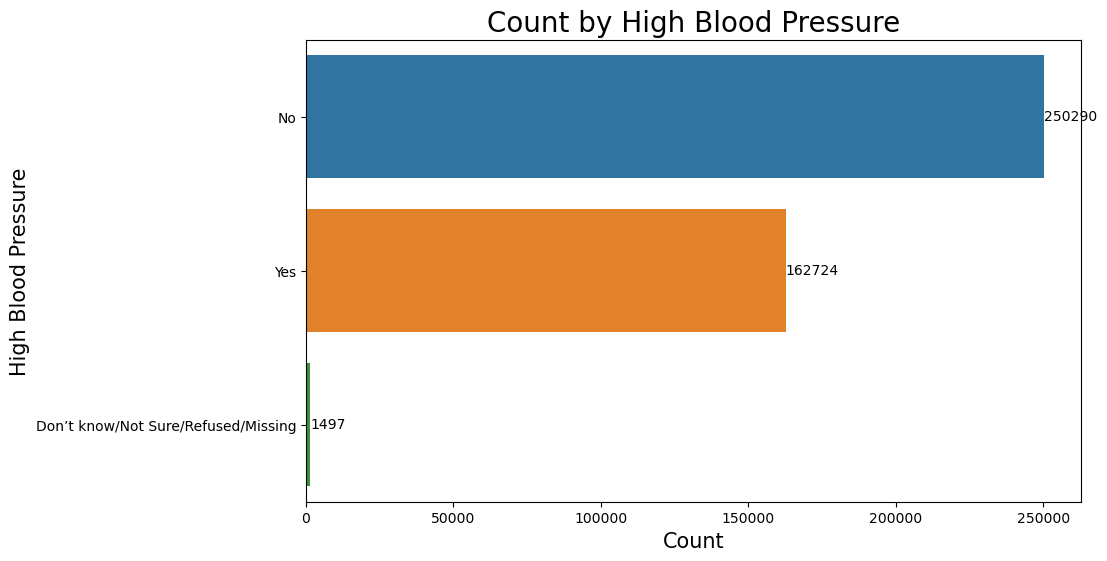

In [24]:
cat_count_eda('_rfhype6')

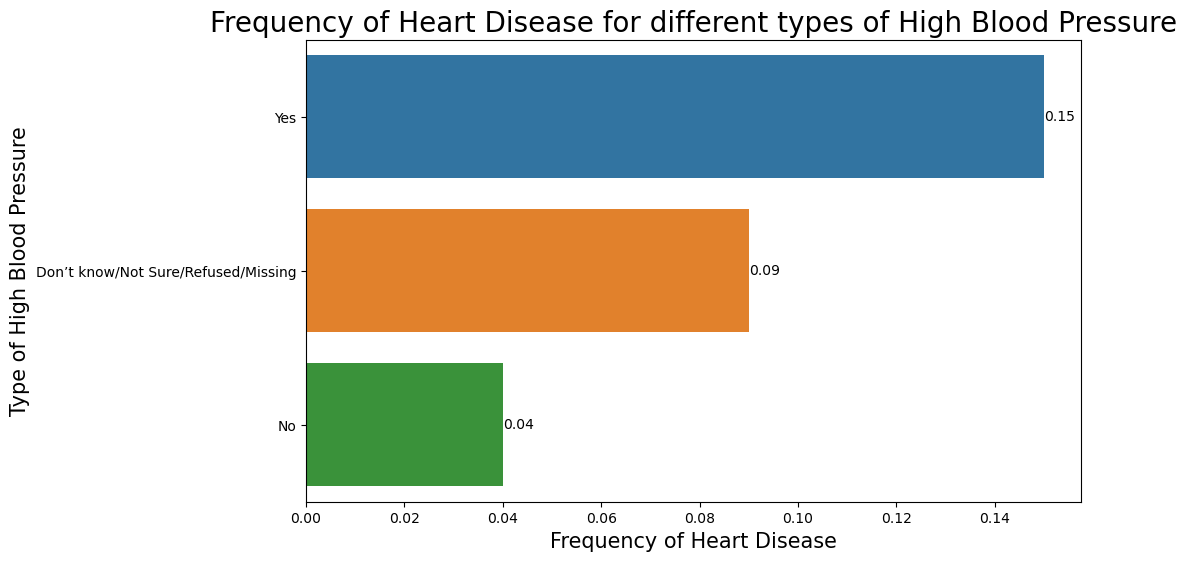

In [25]:
cat_disease_frequency('_rfhype6')

It suggests a potential relationship between high blood pressure and the prevalence of heart disease, with heart disease being more common among individuals who has high blood pressure.

## cholmed3: Currently Taking Medicine For High Cholesterol

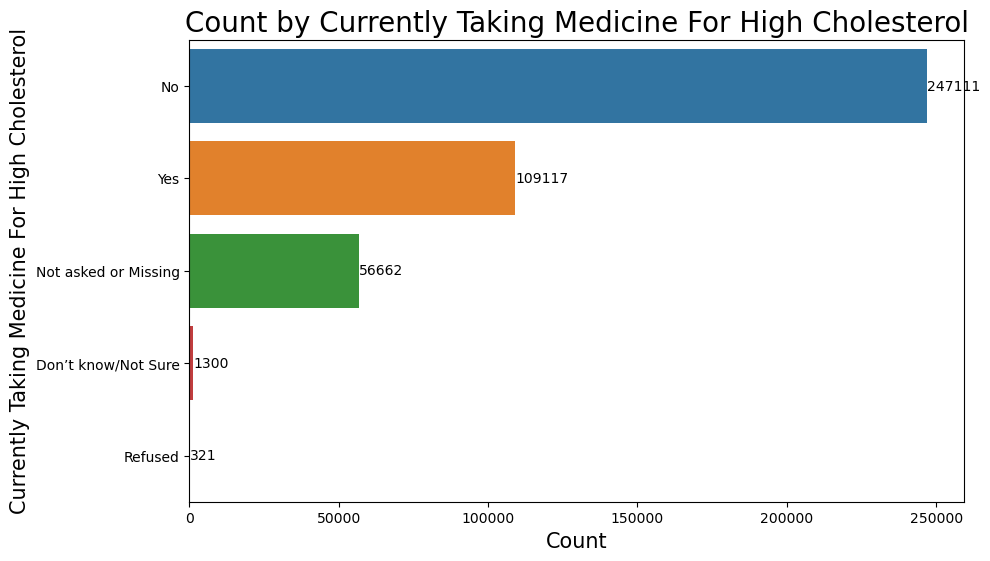

In [26]:
cat_count_eda('cholmed3')

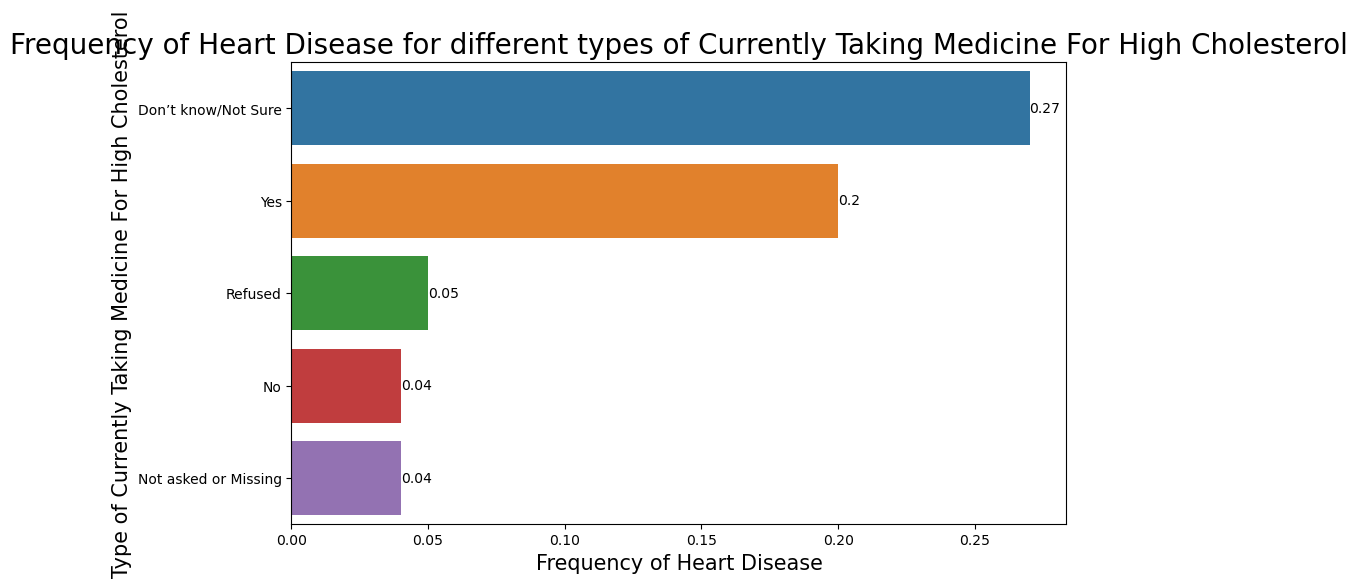

In [27]:
cat_disease_frequency('cholmed3')

It suggests a potential relationship between taking medicine for high cholesterol and the prevalence of heart disease, with heart disease being more common among individuals who are using medicine for high cholesterol.
Interestingly, we see a significant number of over 50,000 responses falling under the category of "Not asked or Missing". This group has the lowest incidence of heart disease. This could possibly be due to these individuals never having experienced these situations, and hence, not being asked the relevant questions.

## _rfchol3: High Cholesterol

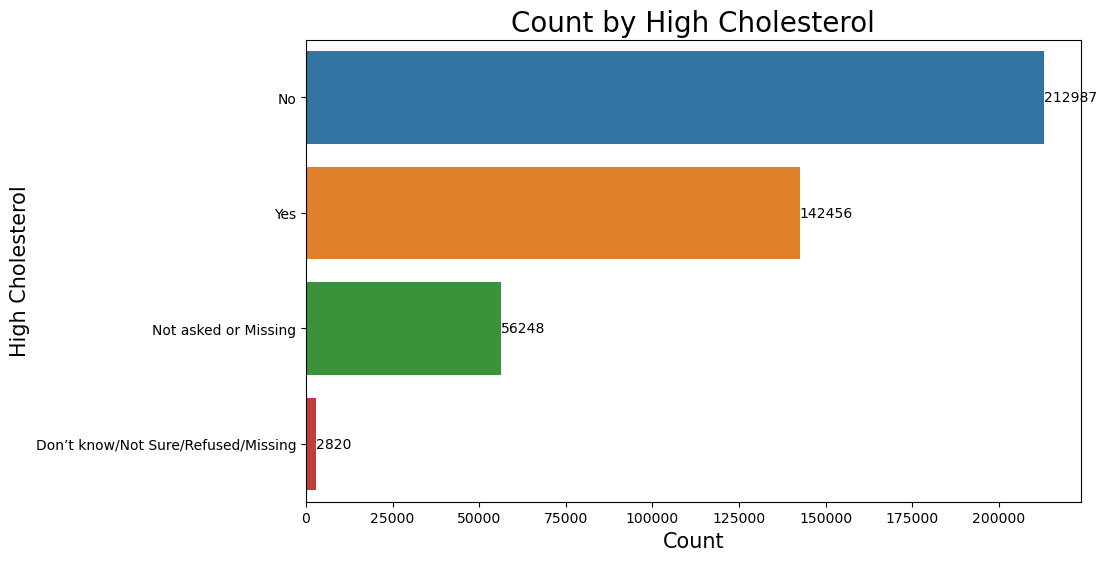

In [28]:
cat_count_eda('_rfchol3')

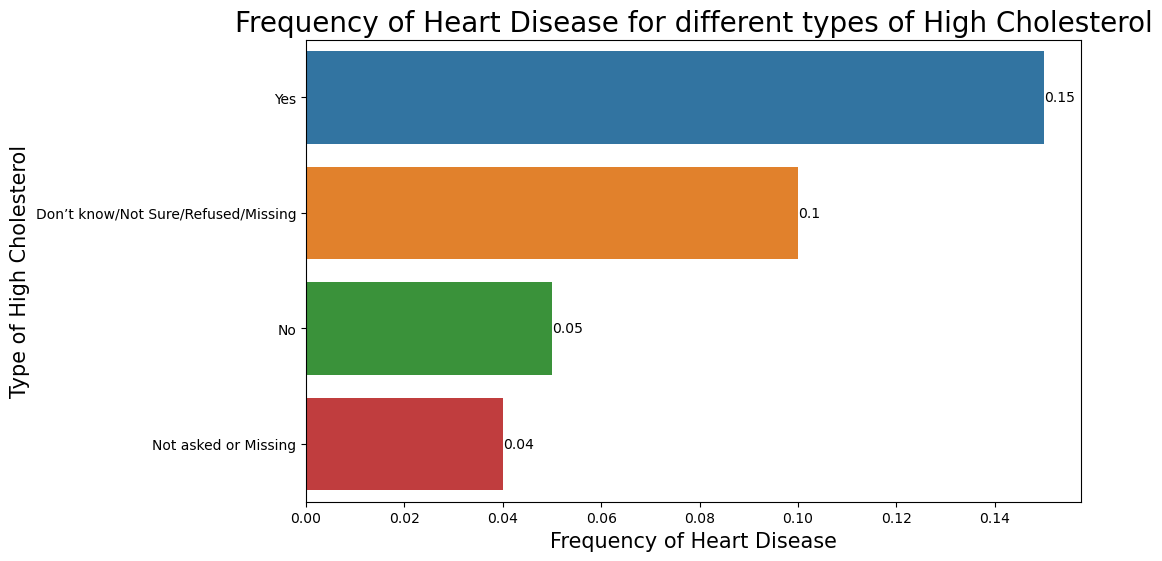

In [29]:
cat_disease_frequency('_rfchol3')

It suggests a potential relationship between high cholesterol and the prevalence of heart disease, with heart disease being more common among individuals who has high cholesterol.
The class of "Not asked or Missing" in high cholesterol has the same charateristic as the feature taking medicine for high cholesterol. This group has the lowest incidence of heart disease. This could possibly be due to these individuals never having experienced these situations, and hence, not being asked the relevant questions.

## cvdstrk3: Stroke

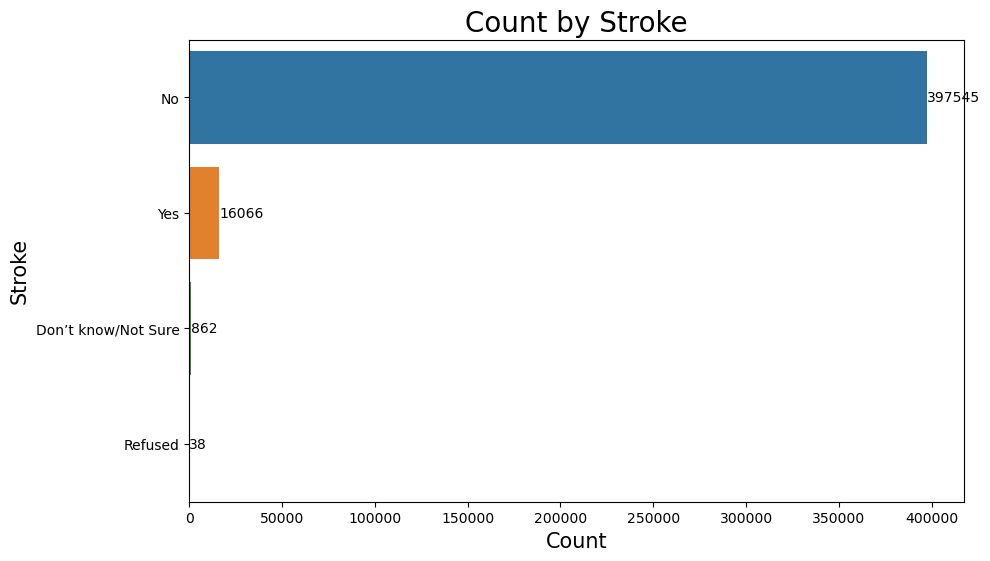

In [30]:
cat_count_eda('cvdstrk3')

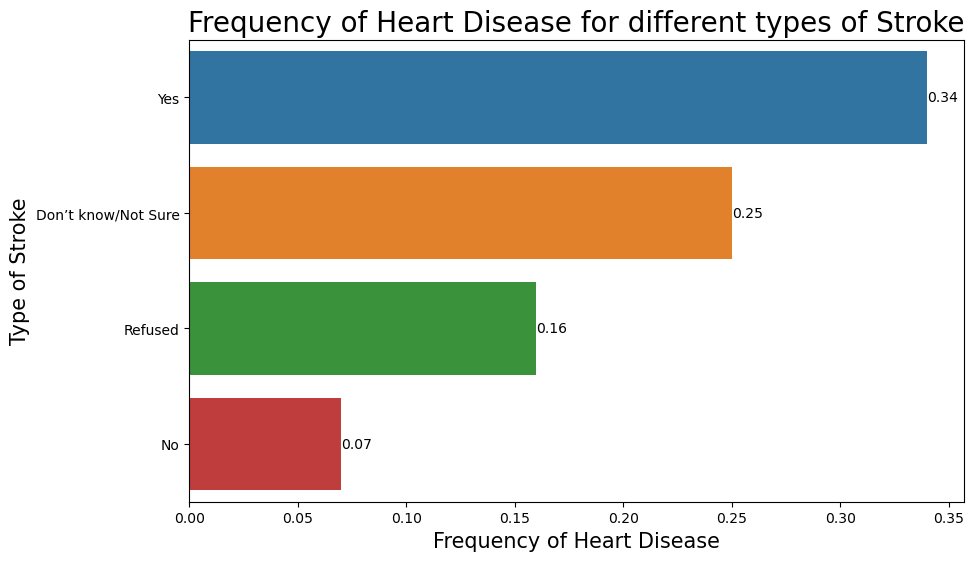

In [31]:
cat_disease_frequency('cvdstrk3')

It suggests a potential relationship between stroke and the prevalence of heart disease, with heart disease being more common among individuals who had stroke.

## _asthms1: Asthma Status

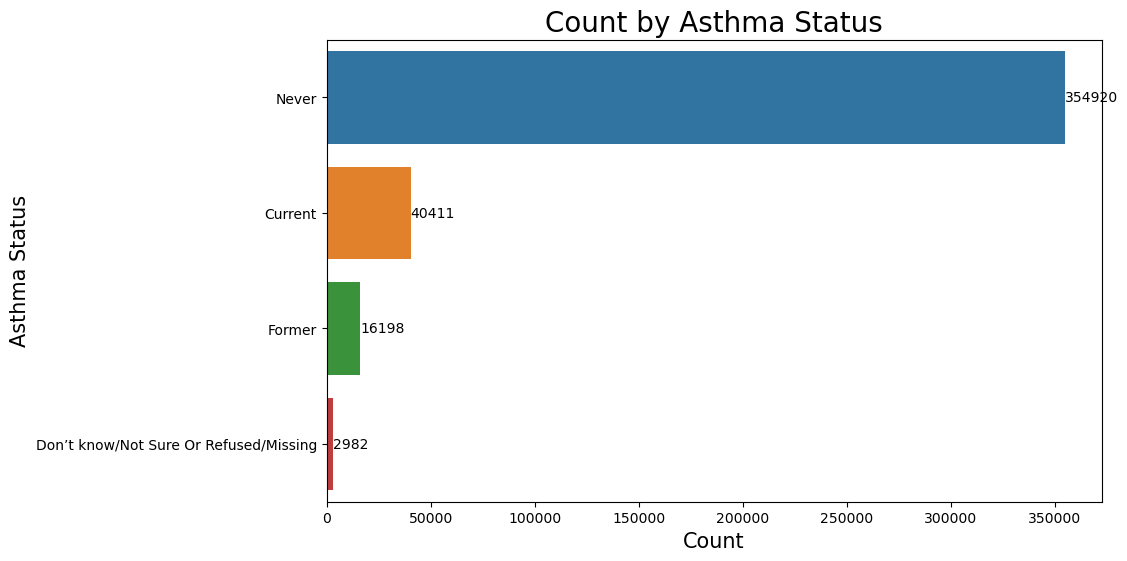

In [32]:
cat_count_eda('_asthms1')

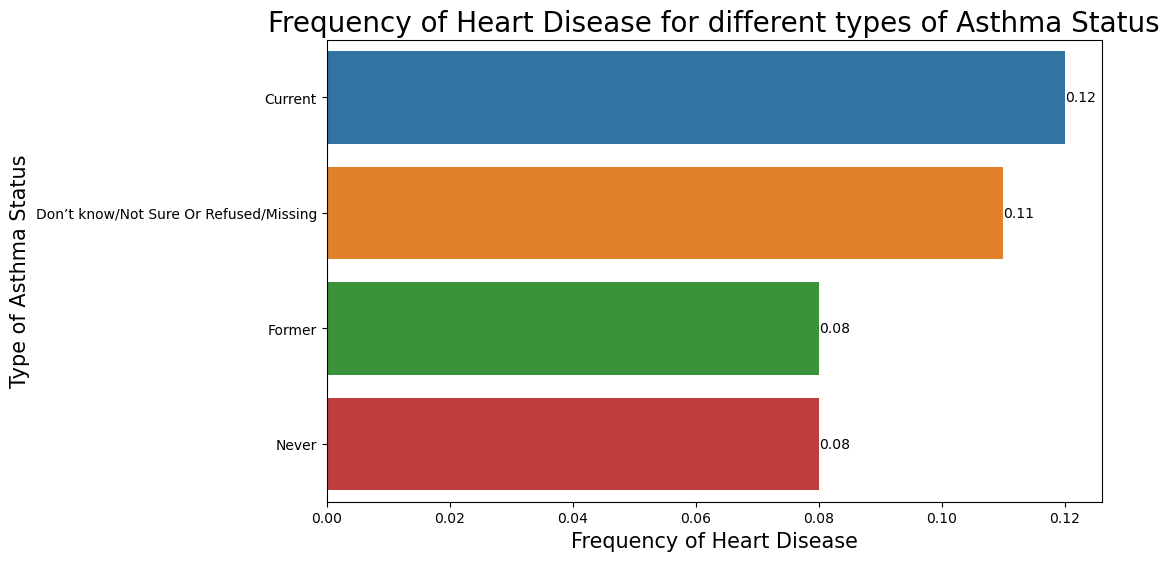

In [33]:
cat_disease_frequency('_asthms1')

It suggests a potential relationship between Asthma Status and the prevalence of heart disease, with heart disease being more common among individuals who currently has Asthma. 
Interestingly, it appears that the group of individuals who have never had asthma and those who have recovered from asthma show a similar proportion.

## chcscncr: Skin Cancer

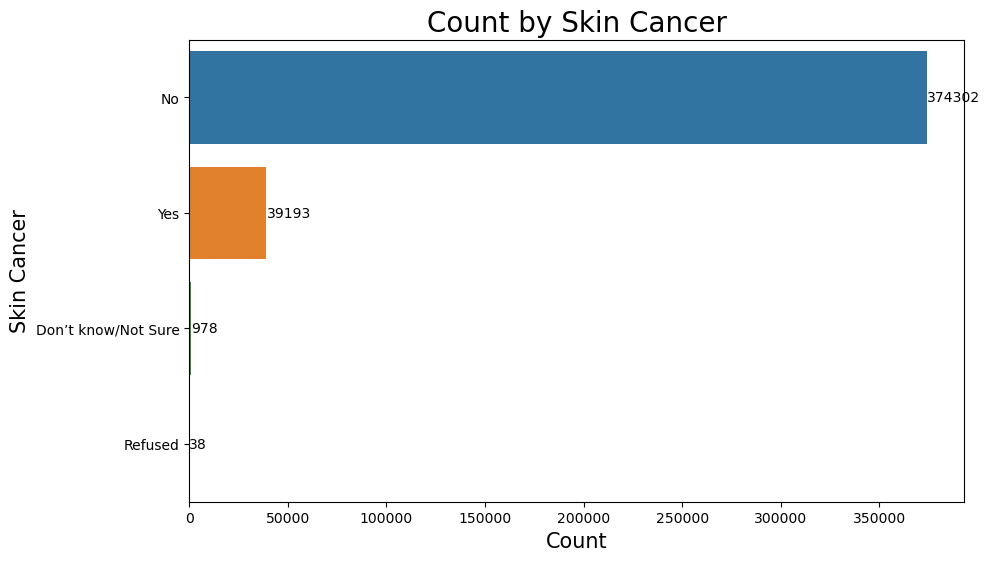

In [34]:
cat_count_eda('chcscncr')

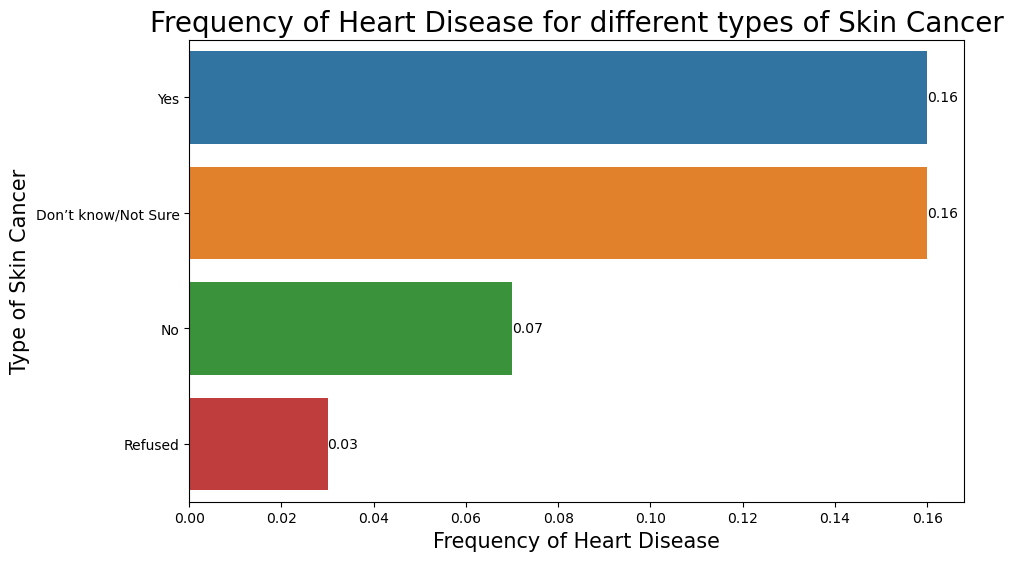

In [35]:
cat_disease_frequency('chcscncr')

It looks like no relationship between heart disease and skin cancer.

## chcocncr: Other Cancer

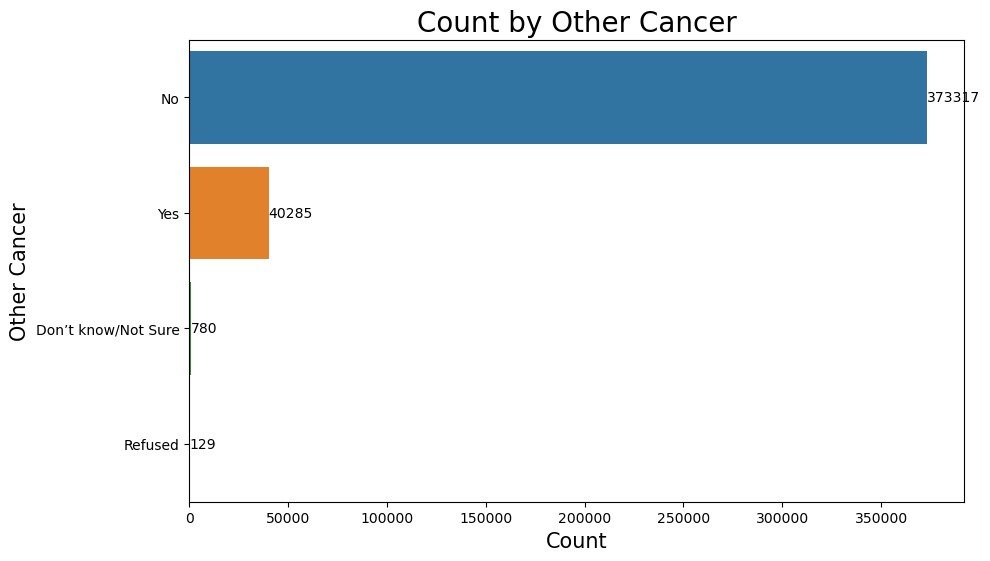

In [36]:
cat_count_eda('chcocncr')

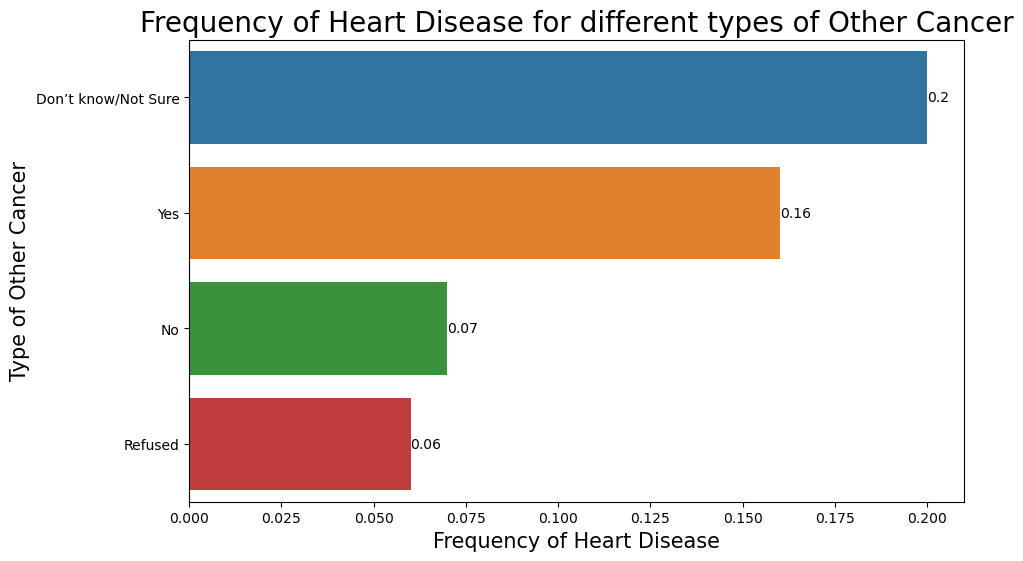

In [37]:
cat_disease_frequency('chcocncr')

It suggests a potential relationship between other cancer and the prevalence of heart disease, with heart disease being more common among individuals who currently has other cancer.

# Numerical Varaibles

In [38]:
df_ran.describe()

,physhlth,menthlth,Heart_Disease
count,406020.000000,407427.000000,414511.000000
mean,3.776366,4.106490,0.082159
std,8.322599,8.148143,0.274608
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,4.000000,0.000000
max,30.000000,30.000000,1.000000


The features 'physhlth' and 'menthlth' are both well-behaved, with no outliers or unexpected values to note. The range for both these features spans from 0 to 30.

In [39]:
num_col = [k for k in num_columns_description.keys()]

## physhlth: Number of Days Physical Health Not Good

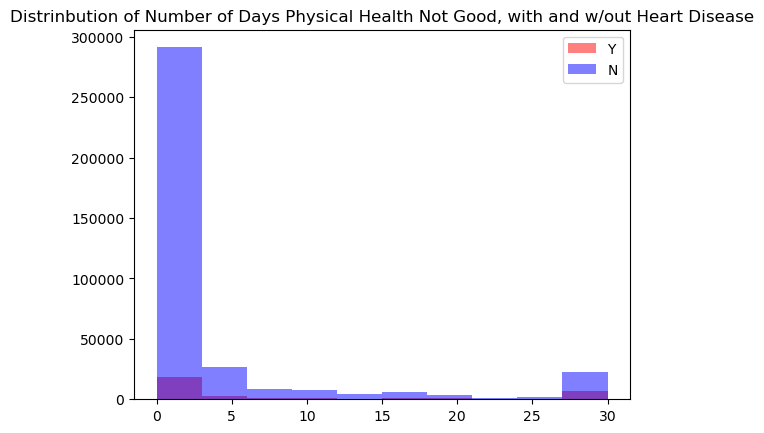

In [40]:
heart_disease = df_ran[df_ran['_michd'] == 'Yes']
no_heart_disease = df_ran[df_ran['_michd'] == 'No']

plt.hist(heart_disease['physhlth'], color = 'r', alpha = 0.5, label = 'Y')
plt.hist(no_heart_disease['physhlth'], color = 'b', alpha = 0.5, label = 'N')

plt.legend()
plt.title('Distrinbution of Number of Days Physical Health Not Good, with and w/out Heart Disease');

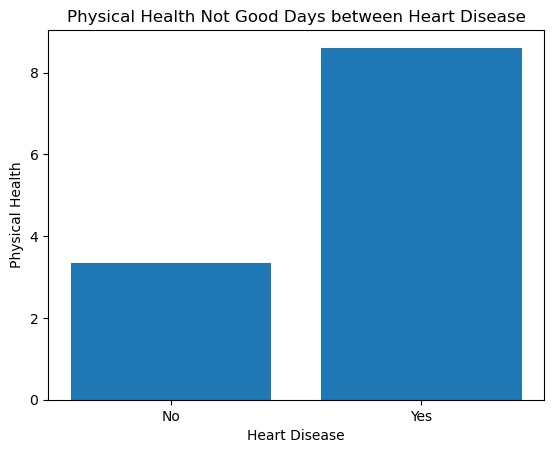

In [41]:
df_rate = df.groupby('_michd').agg({'physhlth': 'mean'})
plt.bar(df_rate.index, df_rate['physhlth'])
plt.title('Physical Health Not Good Days between Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Physical Health');

It suggests a potential relationship between Number of Days Physical Health not good and the prevalence of heart disease, with heart disease being more common among individuals who has more days feeling bad physically.

## menthlth: Number of Days Mental Health Not Good

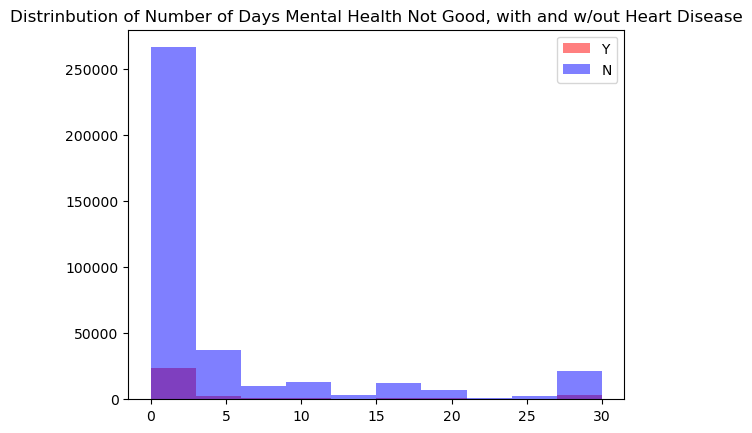

In [42]:
heart_disease = df_ran[df_ran['_michd'] == 'Yes']
no_heart_disease = df_ran[df_ran['_michd'] == 'No']

plt.hist(heart_disease['menthlth'], color = 'r', alpha = 0.5, label = 'Y')
plt.hist(no_heart_disease['menthlth'], color = 'b', alpha = 0.5, label = 'N')

plt.legend()
plt.title('Distrinbution of Number of Days Mental Health Not Good, with and w/out Heart Disease');

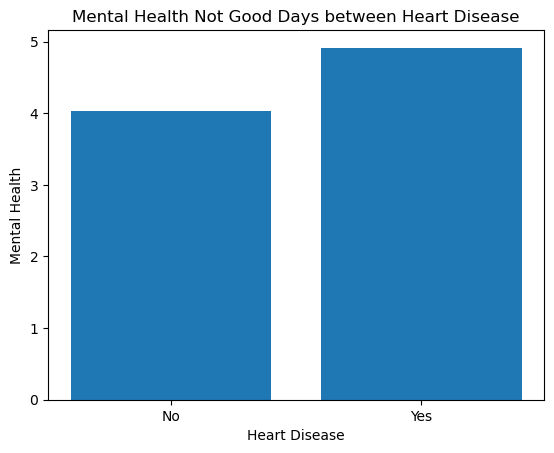

In [43]:
df_rate = df.groupby('_michd').agg({'menthlth': 'mean'})
plt.bar(df_rate.index, df_rate['menthlth'])
plt.title('Mental Health Not Good Days between Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health');

It suggests a potential relationship between Number of Days Mental Health not good and the prevalence of heart disease, with heart disease being more common among individuals who has more days feeling bad mentally.

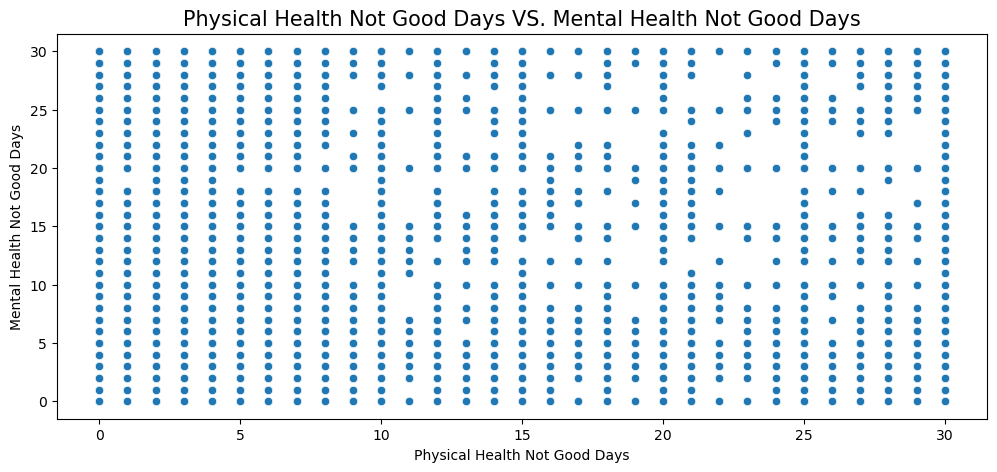

In [44]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'physhlth', y = 'menthlth', data = df_ran)
plt.title('Physical Health Not Good Days VS. Mental Health Not Good Days', size = 15)
plt.xlabel('Physical Health Not Good Days', size = 10)
plt.ylabel('Mental Health Not Good Days', size = 10);

There is no relationship between days of mental health not good and days of physical health not good.